In [ ]:
import os
import pandas as pd
import numpy as np
import pathlib

from logzero import logger

In [ ]:
from fleet_gene.gtex import (cache_dir, GTEXV8_TPM, GTEX_SAMPLE_DS, GTEX_PHENO_DS, GTEX_PHENO_DD,
                             GTEX_GENES_ENSG, GTEX_GENES_SYMBOL, GTEX_GENES_SYMBOL_DUPLICATES)

gtex_tpm_fn = os.path.join(cache_dir, os.path.basename(GTEXV8_TPM))

# Load attributues first
gtex_attr_fn = os.path.join(cache_dir, os.path.basename(GTEX_SAMPLE_DS))
gtex_attr = pd.read_csv(gtex_attr_fn, sep="\t")

# Use only the RNASEQ set
rna_seq_patients = gtex_attr[gtex_attr["SMAFRZE"] == "RNASEQ"]["SAMPID"].tolist()
print(f'Using only RNASEQ {len(rna_seq_patients)} records')

[I 210126 07:45:01 gtex:35] Found /home/dustin/fleet_gene/data
[I 210126 07:45:01 gtex:42] found existing: /home/dustin/fleet_gene/data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_median_tpm.gct.gz
[I 210126 07:45:01 gtex:42] found existing: /home/dustin/fleet_gene/data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct.gz
[I 210126 07:45:01 gtex:42] found existing: /home/dustin/fleet_gene/data/GTEx_Analysis_v8_Annotations_SubjectPhenotypesDS.txt
[I 210126 07:45:01 gtex:42] found existing: /home/dustin/fleet_gene/data/GTEx_Analysis_v8_Annotations_SubjectPhenotypesDD.xlsx
[I 210126 07:45:01 gtex:42] found existing: /home/dustin/fleet_gene/data/GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt
[I 210126 07:45:01 gtex:42] found existing: /home/dustin/fleet_gene/data/GTEx_Analysis_v8_Annotations_SampleAttributesDD.xlsx


Using only RNASEQ 17382 records


In [ ]:
# Choose a random sample of 1/5 the patients
import random

random.seed(42)

GTEX_FRAC = 0.2

patient_list = random.sample(rna_seq_patients, int(len(rna_seq_patients) * GTEX_FRAC))

# Leaves a reserve list for validating with later.
reserve_patients = [patient for patient in rna_seq_patients if patient not in patient_list]

print(f'Total of {len(patient_list)} patients')
print(f'Using {len(patient_list)} RNASEQ patients with a reserve of {len(reserve_patients)})')

Total of 3476 patients
Using 3476 RNASEQ patients with a reserve of 13906)


In [ ]:
logger.info(f"Starting g8 load of {len(patient_list)} samples")
_g8 = pd.read_csv(
        gtex_tpm_fn,
        skiprows=2,  # First 2 rows are comments of file size - other func here to select genes
        sep='\t',
        header=0,
        usecols=["Description"] + patient_list,  # Number of samples limit
    )
# just remove anything ambiguous
_g8.drop(_g8[_g8["Description"].isin(GTEX_GENES_SYMBOL_DUPLICATES)].index, inplace=True)

# Changes size & number of entries (genes)
_g8.info()
logger.info("\tfinished g8 load")

[I 210126 07:45:10 <ipython-input-4-6a3f51e6e1ad>:1] Starting g8 load of 3476 samples
[I 210126 07:47:13 <ipython-input-4-6a3f51e6e1ad>:14] 	finished g8 load


<class 'pandas.core.frame.DataFrame'>
Int64Index: 54393 entries, 0 to 56199
Columns: 3477 entries, Description to GTEX-ZZPU-2226-SM-5EGIV
dtypes: float64(3476), object(1)
memory usage: 1.4+ GB


In [ ]:
_g8.head()

Description  GTEX-1117F-1326-SM-5EGHH  GTEX-111CU-0226-SM-5GZXC  \
0      DDX11L1                     0.000                   0.04667   
1       WASH7P                     5.389                   1.82300   
2    MIR6859-1                     0.000                   0.00000   
3  MIR1302-2HG                     0.000                   0.04659   
4      FAM138A                     0.000                   0.03310   

   GTEX-111CU-0726-SM-5GZYD  GTEX-111CU-1126-SM-5EGIM  \
0                   0.06455                   0.00000   
1                   0.95250                   4.45900   
2                   0.00000                   0.00000   
3                   0.00000                   0.00000   
4                   0.03052                   0.04188   

   GTEX-111FC-0526-SM-5GZZ8  GTEX-111FC-0826-SM-5GZWO  \
0                   0.00000                   0.00000   
1                   7.51700                   2.45800   
2                   0.00000                   0.00000   
3                   0.00000                   0.03116   
4                   0.04789                   0.00000   

   GTEX-111FC-1926-SM-5GZYC  GTEX-111VG-0008-SM-5Q5BG  \
0                    0.5085                    0.0000   
1                    5.3240                    0.9979   
2                    0.0000                    0.0000   
3                    0.0000                    0.0000   
4                    0.0000                    0.0000   

   GTEX-111VG-1626-SM-5EGIO  ...  GTEX-ZYY3-1726-SM-5EGH3  \
0                    0.0000  ...                  0.00000   
1                    2.7940  ...                  1.92400   
2                    0.6737  ...                  0.00000   
3                    0.0000  ...                  0.00000   
4                    0.0000  ...                  0.03437   

   GTEX-ZYY3-2626-SM-5N9DH  GTEX-ZZ64-0126-SM-5GZXA  GTEX-ZZ64-1026-SM-5GZXG  \
0                    0.000                  0.00000                  0.00000   
1                    8.027                  5.59400                  4.14000   
2                    0.000                  0.00000                  0.00000   
3                    0.000                  0.05295                  0.05038   
4                    0.000                  0.00000                  0.03579   

   GTEX-ZZ64-1126-SM-5GZXY  GTEX-ZZ64-1226-SM-5E43R  GTEX-ZZPT-2926-SM-5EQ5S  \
0                   0.3920                  0.00000                  0.03126   
1                   4.7030                  2.46600                  3.90700   
2                   0.0000                  0.00000                  0.00000   
3                   0.0559                  0.00000                  0.00000   
4                   0.0000                  0.05597                  0.00000   

   GTEX-ZZPT-3026-SM-5GZXH  GTEX-ZZPU-0526-SM-5E44U  GTEX-ZZPU-2226-SM-5EGIV  
0                  0.01874                  0.04614                    0.000  
1                  2.12300                  2.73300                    1.922  
2                  0.00000                  0.00000                    0.000  
3                  0.00000                  0.09211                    0.000  
4                  0.00000                  0.03272                    0.000  

[5 rows x 3477 columns]

In [ ]:
# Switch to columns of genes and rows of patients
_g8.set_index("Description", inplace=True)
g8 = _g8.T
del _g8
g8.head()

Description               DDX11L1  WASH7P  MIR6859-1  MIR1302-2HG  FAM138A  \
GTEX-1117F-1326-SM-5EGHH  0.00000  5.3890        0.0      0.00000  0.00000   
GTEX-111CU-0226-SM-5GZXC  0.04667  1.8230        0.0      0.04659  0.03310   
GTEX-111CU-0726-SM-5GZYD  0.06455  0.9525        0.0      0.00000  0.03052   
GTEX-111CU-1126-SM-5EGIM  0.00000  4.4590        0.0      0.00000  0.04188   
GTEX-111FC-0526-SM-5GZZ8  0.00000  7.5170        0.0      0.00000  0.04789   

Description                OR4G4P  OR4G11P    OR4F5  RP11-34P13.7   CICP27  \
GTEX-1117F-1326-SM-5EGHH  0.06130  0.00000  0.05609       0.05006  0.00000   
GTEX-111CU-0226-SM-5GZXC  0.00000  0.00000  0.04395       0.00000  0.05827   
GTEX-111CU-0726-SM-5GZYD  0.00000  0.03958  0.08106       0.03617  0.41910   
GTEX-111CU-1126-SM-5EGIM  0.12160  0.16290  0.00000       0.07446  0.08848   
GTEX-111FC-0526-SM-5GZZ8  0.06949  0.00000  0.06359       0.02838  0.01686   

Description               ...   MT-ND4   MT-TH  MT-TS2  MT-TL2   MT-ND5  \
GTEX-1117F-1326-SM-5EGHH  ...  32020.0   0.000  0.0000   0.000   2578.0   
GTEX-111CU-0226-SM-5GZXC  ...  29430.0  23.980  2.0520   1.705  11920.0   
GTEX-111CU-0726-SM-5GZYD  ...  19760.0   1.618  0.6306   2.096   7625.0   
GTEX-111CU-1126-SM-5EGIM  ...  36540.0   4.439  2.5960   4.314  19390.0   
GTEX-111FC-0526-SM-5GZZ8  ...  25910.0   0.846  0.0000   0.000   3122.0   

Description                MT-ND6    MT-TE   MT-CYB   MT-TT  MT-TP  
GTEX-1117F-1326-SM-5EGHH   1857.0    3.731  18180.0  0.7801  2.272  
GTEX-111CU-0226-SM-5GZXC  16030.0   50.290  24690.0  0.6113  0.000  
GTEX-111CU-0726-SM-5GZYD   9659.0   32.350  16860.0  0.0000  1.641  
GTEX-111CU-1126-SM-5EGIM  26390.0  113.900  35020.0  8.5090  4.505  
GTEX-111FC-0526-SM-5GZZ8   2877.0    2.538  17930.0  0.0000  4.292  

[5 rows x 54393 columns]

In [ ]:
# one-hot encode the tissue categories - make one column per tissue type with 1/0 type
gtex_attr.set_index("SAMPID", inplace=True)
gtex_attr["SMTS"] = gtex_attr["SMTS"].astype("category")

tissue_df = pd.get_dummies(gtex_attr["SMTS"], dtype=float)
print(tissue_df.columns)
tissue_df.head()


CategoricalIndex(['Adipose Tissue', 'Adrenal Gland', 'Bladder', 'Blood',
                  'Blood Vessel', 'Bone Marrow', 'Brain', 'Breast',
                  'Cervix Uteri', 'Colon', 'Esophagus', 'Fallopian Tube',
                  'Heart', 'Kidney', 'Liver', 'Lung', 'Muscle', 'Nerve',
                  'Ovary', 'Pancreas', 'Pituitary', 'Prostate',
                  'Salivary Gland', 'Skin', 'Small Intestine', 'Spleen',
                  'Stomach', 'Testis', 'Thyroid', 'Uterus', 'Vagina'],
                 categories=['Adipose Tissue', 'Adrenal Gland', 'Bladder', 'Blood', 'Blood Vessel', 'Bone Marrow', 'Brain', 'Breast', ...], ordered=False, dtype='category')


Adipose Tissue  Adrenal Gland  Bladder  Blood  \
SAMPID                                                                         
GTEX-1117F-0003-SM-58Q7G                  0.0            0.0      0.0    1.0   
GTEX-1117F-0003-SM-5DWSB                  0.0            0.0      0.0    1.0   
GTEX-1117F-0003-SM-6WBT7                  0.0            0.0      0.0    1.0   
GTEX-1117F-0011-R10a-SM-AHZ7F             0.0            0.0      0.0    0.0   
GTEX-1117F-0011-R10b-SM-CYKQ8             0.0            0.0      0.0    0.0   

                               Blood Vessel  Bone Marrow  Brain  Breast  \
SAMPID                                                                    
GTEX-1117F-0003-SM-58Q7G                0.0          0.0    0.0     0.0   
GTEX-1117F-0003-SM-5DWSB                0.0          0.0    0.0     0.0   
GTEX-1117F-0003-SM-6WBT7                0.0          0.0    0.0     0.0   
GTEX-1117F-0011-R10a-SM-AHZ7F           0.0          0.0    1.0     0.0   
GTEX-1117F-0011-R10b-SM-CYKQ8           0.0          0.0    1.0     0.0   

                               Cervix Uteri  Colon  ...  Prostate  \
SAMPID                                              ...             
GTEX-1117F-0003-SM-58Q7G                0.0    0.0  ...       0.0   
GTEX-1117F-0003-SM-5DWSB                0.0    0.0  ...       0.0   
GTEX-1117F-0003-SM-6WBT7                0.0    0.0  ...       0.0   
GTEX-1117F-0011-R10a-SM-AHZ7F           0.0    0.0  ...       0.0   
GTEX-1117F-0011-R10b-SM-CYKQ8           0.0    0.0  ...       0.0   

                               Salivary Gland  Skin  Small Intestine  Spleen  \
SAMPID                                                                         
GTEX-1117F-0003-SM-58Q7G                  0.0   0.0              0.0     0.0   
GTEX-1117F-0003-SM-5DWSB                  0.0   0.0              0.0     0.0   
GTEX-1117F-0003-SM-6WBT7                  0.0   0.0              0.0     0.0   
GTEX-1117F-0011-R10a-SM-AHZ7F             0.0   0.0              0.0     0.0   
GTEX-1117F-0011-R10b-SM-CYKQ8             0.0   0.0              0.0     0.0   

                               Stomach  Testis  Thyroid  Uterus  Vagina  
SAMPID                                                                   
GTEX-1117F-0003-SM-58Q7G           0.0     0.0      0.0     0.0     0.0  
GTEX-1117F-0003-SM-5DWSB           0.0     0.0      0.0     0.0     0.0  
GTEX-1117F-0003-SM-6WBT7           0.0     0.0      0.0     0.0     0.0  
GTEX-1117F-0011-R10a-SM-AHZ7F      0.0     0.0      0.0     0.0     0.0  
GTEX-1117F-0011-R10b-SM-CYKQ8      0.0     0.0      0.0     0.0     0.0  

[5 rows x 31 columns]

In [ ]:
g8 = g8.merge(tissue_df, how="inner", left_index=True, right_index=True)

In [ ]:
# Tissue catgorizing attempt

# Add tissue details
# tissue = gtex_attr[["SAMPID", "SMTS", "SMTSD"]].copy()
# tissue["SMTS"] = tissue["SMTS"].astype("category")
# tissue["SMTSD"] = tissue["SMTSD"].astype("category")
g8.info()
g8.head()

dep_var = list(tissue_df.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 3476 entries, GTEX-1117F-1326-SM-5EGHH to GTEX-ZZPU-2226-SM-5EGIV
Columns: 54424 entries, DDX11L1 to Vagina
dtypes: float64(54424)
memory usage: 1.4+ GB


## ML Imports

In [ ]:
from fastai.tabular.all import (L, F, Categorify, FillMissing, Normalize, TabularPandas,
                                cont_cat_split, save_pickle, load_pickle, tabular_learner)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from dtreeviz.trees import dtreeviz
from fastbook import cluster_columns, draw_tree

In [ ]:
# Find continuous and categorical columns
# gene TPM (transcripts per million) would be a continuous range
cont,cat = cont_cat_split(g8, max_card=500, dep_var=dep_var)

int_index = range(len(g8))
# random, even split of training and validation
train_idx = random.sample(int_index, len(int_index) // 2)
valid_idx = [i for i in int_index if i not in train_idx]

In [ ]:
train_ob = TabularPandas(g8, procs=[FillMissing, Categorify], cat_names=cat,
                         cont_names=cont, y_names=dep_var, splits=(train_idx, valid_idx))

In [ ]:
len(g8)

3476

In [ ]:
train_ob.show(2)

In [ ]:
save_pickle(os.path.join(cache_dir, "train_ob_tissue.pkl"), train_ob)

# Decision Tree

In [ ]:
import math
def r_mse(pred, y):
    return round(math.sqrt(((pred-y)**2).mean()), 6)


def m_rmse(m, xs, y):
    return r_mse(m.predict(xs), y)

## Random Forest

In [ ]:
def rf(xs, ys, n_estimators=40, max_samples=None,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    """Random Forest setup helper"""
    return RandomForestClassifier(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, ys)

In [ ]:
valid_xs = train_ob.valid.xs
valid_ys = train_ob.valid.ys

xs = train_ob.train.xs
ys = train_ob.train.ys

m = rf(xs, ys)

In [ ]:
rf_preds = np.stack([t.predict(valid_xs) for t in m.estimators_])
rf_preds.shape

(40, 1738, 31)

In [ ]:
m.predict(valid_xs.iloc[1:2])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
valid_ys.iloc[1]

Adipose Tissue     0.0
Adrenal Gland      0.0
Bladder            0.0
Blood              0.0
Blood Vessel       0.0
Bone Marrow        0.0
Brain              0.0
Breast             0.0
Cervix Uteri       0.0
Colon              0.0
Esophagus          0.0
Fallopian Tube     0.0
Heart              0.0
Kidney             0.0
Liver              0.0
Lung               0.0
Muscle             0.0
Nerve              0.0
Ovary              0.0
Pancreas           0.0
Pituitary          0.0
Prostate           0.0
Salivary Gland     0.0
Skin               0.0
Small Intestine    0.0
Spleen             0.0
Stomach            0.0
Testis             0.0
Thyroid            1.0
Uterus             0.0
Vagina             0.0
Name: GTEX-111CU-0226-SM-5GZXC, dtype: float32

In [ ]:
max_feature_list = [0.5, 'sqrt', 'log2', None]
m_dict = {}

ESTIMATORS = 60
for mf in max_feature_list:
    logger.info(f"Starting traing with {ESTIMATORS} estimators and {mf} genes")
    m = rf(xs, y, n_estimators=ESTIMATORS, max_features=mf)
    logger.info(f"With 400 estimators rmse train, valid: {m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)}")
    m_dict[mf] = m

In [ ]:
import matplotlib.pyplot as plt

predsd = dict()
for mf in max_feature_list:
    preds = np.stack([t.predict(valid_xs) for t in m_dict[mf].estimators_])
    plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(100)])
    predsd[mf] = preds
plt.legend([str(i) for i in max_feature_list])

In [ ]:

def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [ ]:
fi = rf_feat_importance(m, xs)
fi[:20]

cols       imp
12606         NKX6-1  0.056956
28791         NLRP10  0.048176
49900      LINC00320  0.045304
3089         C1orf61  0.044060
464           FBLIM1  0.036779
48147          TNNI3  0.031551
45458       SERPINB7  0.028452
23294          FABP4  0.021240
13352        MAB21L2  0.018151
41371     AC004158.3  0.016960
15772           PSD2  0.016007
20645           GRM3  0.012375
47270          TTC9B  0.011742
3900           TNNT2  0.011353
20608           CD36  0.010614
803           FAM46B  0.010257
463    RP11-169K16.4  0.009624
15024          EDIL3  0.009327
50101          OLIG1  0.008292
43394        CD300LG  0.008099

<AxesSubplot:ylabel='cols'>

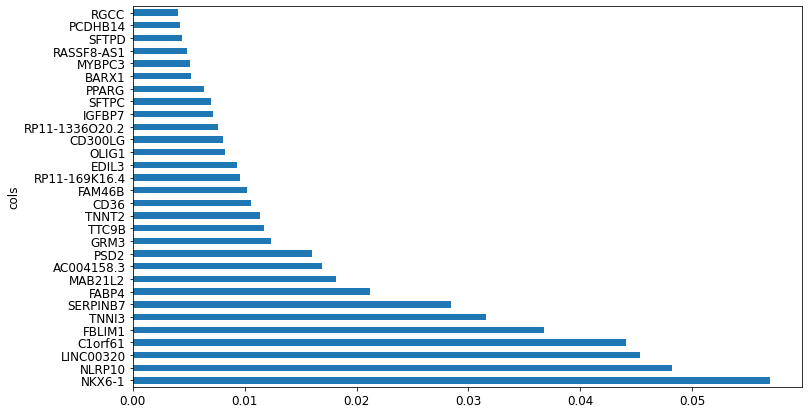

In [ ]:
fi[:30].plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

In [ ]:
fi[3000:3001]

# Keep top 3000 genes
to_keep = fi[fi.imp>0.000003].cols
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [ ]:
m = rf(xs_imp, y)

In [ ]:
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

In [ ]:
train_ob.show(1)

In [ ]:
# if we let Categorify work the translations are in
# train_ob.vocab

## Neural Network

In [ ]:
from fastai.tabular.all import to_cpu
to_cpu(dls.train.one_batch())

(tensor([], size=(512, 0), dtype=torch.int64),
 tensor([[5.5710e-03, 8.9930e-01, 0.0000e+00,  ..., 4.0410e+04, 5.1080e+00, 4.5610e+01],
         [1.6640e-01, 7.9080e+00, 0.0000e+00,  ..., 2.2950e+04, 5.4490e-01, 1.0580e+00],
         [0.0000e+00, 1.0390e+01, 0.0000e+00,  ..., 1.9080e+04, 0.0000e+00, 1.3760e+00],
         ...,
         [0.0000e+00, 6.1920e+00, 0.0000e+00,  ..., 2.3830e+04, 7.5510e-01, 1.1730e+01],
         [0.0000e+00, 3.3620e+00, 0.0000e+00,  ..., 1.0720e+04, 4.5100e-01, 0.0000e+00],
         [0.0000e+00, 6.9940e+00, 0.0000e+00,  ..., 1.1220e+04, 0.0000e+00, 0.0000e+00]]),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]))

In [ ]:
dls = train_ob.dataloaders(batch_size=512)

In [ ]:
def accuracy(inp, targ, axis=-1):
    "Compute accuracy with `targ` when `pred` is bs * n_classes"
    pred = inp.argmax(dim=axis)
    target = targ.argmax(dim=axis)
    return (pred == target).float().mean()

In [ ]:
learn = tabular_learner(dls, y_range=(0,1), layers=[500,250],
                        n_out=len(dep_var),
                        metrics=accuracy,
                       )

SuggestedLRs(lr_min=0.03630780577659607, lr_steep=0.009120108559727669)

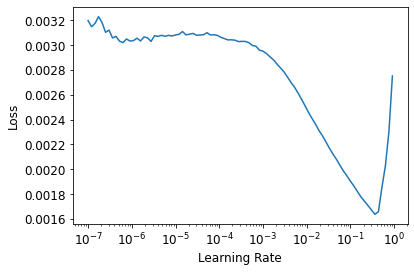

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, 1e-4)

In [ ]:
learn.fit_one_cycle(25, 1e-3)

In [ ]:
full_dec,dec_pred,pred = learn.predict(valid_xs.iloc[0])

<AxesSubplot:>

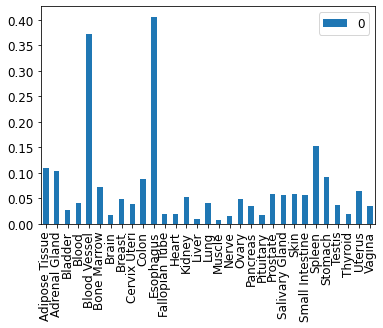

In [ ]:
def plot_pred(pred):
    pred_df = pd.DataFrame(pred)
    pred_df.index = dep_var
    return pred_df.plot.bar()
plot_pred(pred)

In [ ]:
valid_ys.iloc[0]

Adipose Tissue     1.0
Adrenal Gland      0.0
Bladder            0.0
Blood              0.0
Blood Vessel       0.0
Bone Marrow        0.0
Brain              0.0
Breast             0.0
Cervix Uteri       0.0
Colon              0.0
Esophagus          0.0
Fallopian Tube     0.0
Heart              0.0
Kidney             0.0
Liver              0.0
Lung               0.0
Muscle             0.0
Nerve              0.0
Ovary              0.0
Pancreas           0.0
Pituitary          0.0
Prostate           0.0
Salivary Gland     0.0
Skin               0.0
Small Intestine    0.0
Spleen             0.0
Stomach            0.0
Testis             0.0
Thyroid            0.0
Uterus             0.0
Vagina             0.0
Name: GTEX-1117F-1326-SM-5EGHH, dtype: float32

In [ ]:
preds,targs = learn.get_preds()
accuracy(preds, targs)

tensor(0.9258)

In [ ]:
from fastai.tabular.all import tensor
def m_accuracy(m, xs, ys):
    return accuracy(tensor(m.predict(xs)), tensor(ys))

m_accuracy(m, valid_xs, valid_ys)

tensor(0.9603)

In [ ]:
_,_,prednn = learn.predict(valid_xs.iloc[0])

tensor([0.1100, 0.1041, 0.0269, 0.0410, 0.3723, 0.0712, 0.0172, 0.0475, 0.0378, 0.0883, 0.4059, 0.0199, 0.0182, 0.0523, 0.0094, 0.0400, 0.0071, 0.0145, 0.0490, 0.0340, 0.0179, 0.0586, 0.0566, 0.0577,
        0.0566, 0.1528, 0.0923, 0.0367, 0.0196, 0.0631, 0.0355])


<AxesSubplot:>

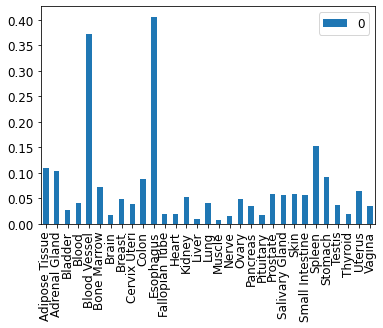

In [ ]:
print(prednn)
plot_pred(prednn)

<AxesSubplot:>

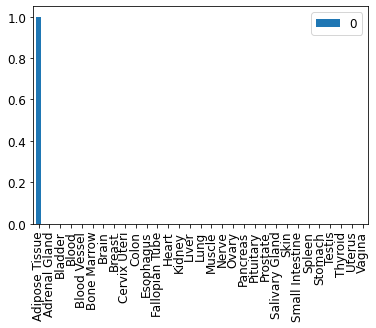

In [ ]:
predrf = tensor(m.predict(valid_xs.iloc[0:1]))[0]
plot_pred(predrf)

<AxesSubplot:>

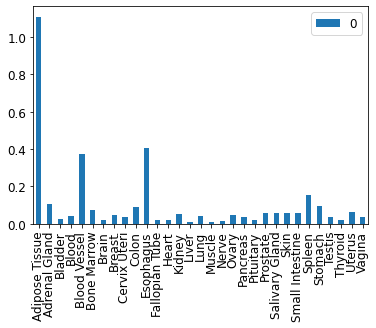

In [ ]:
plot_pred(predrf + prednn)

In [ ]:

#%load_ext memory_profiler
%memit

import sys

def show_large_mem_users(max_num=10):
    return sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules],
                  key=lambda x: x[1], reverse=True)[:max_num]
mems = sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules],
                  key=lambda x: x[1], reverse=True)

UsageError: Line magic function `%memit` not found.


In [ ]:
learn.summary()

TabularModel (Input shape: 512 x torch.Size([512, 54393]))
Layer (type)         Output Shape         Param #    Trainable 
                     512 x 54393         
BatchNorm1d                               108786     True      
BatchNorm1d                               108786     True      
____________________________________________________________________________
                     512 x 500           
Linear                                    27196500   True      
ReLU                                                           
BatchNorm1d                               1000       True      
____________________________________________________________________________
                     512 x 250           
Linear                                    125000     True      
ReLU                                                           
____________________________________________________________________________
                     512 x 31            
Linear                        

In [ ]:
# Example of NN error from: https://forums.fast.ai/t/tabular-learner-error-found-dtype-char-but-expected-float/77245

data = {
    'user_id': {0: 32, 1: 100, 2: 122, 3: 156, 4: 152, 5: 166, 6: 155, 7: 308, 8: 330, 9: 523},
    'other_user_id': {0: 60, 1: 60, 2: 60, 3: 60, 4: 60, 5: 60, 6: 60, 7: 60, 8: 60, 9: 60},
    'type': {0: 0, 1: 1, 2: 0, 3: 1, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0}
}

df = pd.DataFrame(data)

# Uncomment line below to fix error
# df["type"] = df["type"].astype(np.float)

dep_var = "type"
cont,cat = cont_cat_split(df, max_card=7000, dep_var=dep_var)
splits = [[0, 1, 3, 4, 5, 6, 7], [2, 8, 9]]

procs = [Categorify, FillMissing, Normalize]
to = TabularPandas(df, procs, cat, cont, splits=splits, y_names=dep_var)
dls = to.dataloaders(5)

learn = tabular_learner(dls, y_range=(-0.2,1.2), layers=[500,250],
                        n_out=1, loss_func=F.mse_loss)

learn.lr_find() # or `learn.fit_one_cycle(5, 1e-2)`